<a href="https://colab.research.google.com/github/HagosGithub/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import unittest
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


In [5]:
df = pd.read_csv("epa-sea-level.csv", float_precision="legacy").rename(
        columns={"Year": "year","CSIRO Adjusted Sea Level": "sea",
        }
    )


In [6]:
df

,year,sea,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [7]:
def draw_plot():
    # Read data from file
    df = pd.read_csv("epa-sea-level.csv", float_precision="legacy").rename(
        columns={"Year": "year","CSIRO Adjusted Sea Level": "sea",
        }
    )

    # Create scatter plot
    plt.figure(1, figsize=(16, 9))
    plt.scatter(df["year"], df["sea"])

    # Create first line of best fit, with existing data
    regress = linregress(df["year"], df["sea"])

    # increase data size for future prediction
    last_year = df["year"].max()
    df = df.append([{"year": y} for y in range(last_year + 1, 2050)])
    plt.plot(
        df["year"],
        regress.intercept + regress.slope * df["year"],
        c="r",
        label="fit all",
    )

    # Create second line of best fit
    df_recent = df.loc[(df["year"] >= 2000) & (df["year"] <= last_year)]
    bestfit = linregress(df_recent["year"], df_recent["sea"])
    df_recent = df_recent.append(
        [{"year": y} for y in range(last_year + 1, 2050)]
    )
    plt.plot(
        df_recent["year"],
        bestfit.intercept + bestfit.slope * df_recent["year"],
        c="b",
        label="fit recent",
    )

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    return plt.gca()

In [8]:
class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.ax = draw_plot()

    def test_plot_title(self):
        actual = self.ax.get_title()
        expected = "Rise in Sea Level"
        self.assertEqual(
            actual,
            expected,
            "Expected line plot title to be 'Rise in Sea Level'",
        )

    def test_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Year"
        self.assertEqual(
            actual, expected, "Expected line plot xlabel to be 'Year'"
        )
        actual = self.ax.get_ylabel()
        expected = "Sea Level (inches)"
        self.assertEqual(
            actual,
            expected,
            "Expected line plot ylabel to be 'Sea Level (inches)'",
        )
        actual = self.ax.get_xticks().tolist()
        expected = [
            1850.0,
            1875.0,
            1900.0,
            1925.0,
            1950.0,
            1975.0,
            2000.0,
            2025.0,
            2050.0,
            2075.0,
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected x tick labels to be '1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0'",
        )

    def test_plot_data_points(self):
        actual = self.ax.get_children()[0].get_offsets().data.tolist()
        expected = [
            [1880.0, 0.0],
            [1881.0, 0.22047244100000002],
            [1882.0, -0.440944881],
            [1883.0, -0.232283464],
            [1884.0, 0.590551181],
            [1885.0, 0.531496062],
            [1886.0, 0.43700787399999996],
            [1887.0, 0.216535433],
            [1888.0, 0.299212598],
            [1889.0, 0.362204724],
            [1890.0, 0.440944881],
            [1891.0, 0.374015748],
            [1892.0, 0.499999999],
            [1893.0, 0.6850393690000001],
            [1894.0, 0.303149606],
            [1895.0, 0.767716535],
            [1896.0, 0.46850393700000004],
            [1897.0, 0.6732283459999999],
            [1898.0, 1.043307086],
            [1899.0, 1.338582676],
            [1900.0, 1.125984251],
            [1901.0, 1.1102362190000001],
            [1902.0, 1.291338581],
            [1903.0, 1.6062992109999998],
            [1904.0, 1.2007874],
            [1905.0, 0.9842519679999999],
            [1906.0, 1.251968503],
            [1907.0, 1.196850392],
            [1908.0, 1.098425196],
            [1909.0, 1.27559055],
            [1910.0, 1.2716535420000001],
            [1911.0, 1.598425195],
            [1912.0, 1.476377951],
            [1913.0, 1.5472440930000002],
            [1914.0, 1.795275589],
            [1915.0, 2.10629921],
            [1916.0, 2.031496061],
            [1917.0, 1.854330707],
            [1918.0, 1.791338581],
            [1919.0, 1.854330707],
            [1920.0, 1.905511809],
            [1921.0, 1.988188974],
            [1922.0, 1.952755904],
            [1923.0, 1.999999998],
            [1924.0, 1.7125984230000002],
            [1925.0, 1.791338581],
            [1926.0, 2.0472440919999997],
            [1927.0, 2.003937006],
            [1928.0, 1.850393699],
            [1929.0, 1.905511809],
            [1930.0, 2.062992124],
            [1931.0, 2.0472440919999997],
            [1932.0, 2.271653541],
            [1933.0, 2.440944879],
            [1934.0, 2.228346454],
            [1935.0, 2.448818895],
            [1936.0, 2.295275588],
            [1937.0, 2.519685037],
            [1938.0, 2.6220472409999998],
            [1939.0, 2.826771651],
            [1940.0, 2.618110234],
            [1941.0, 3.098425194],
            [1942.0, 3.098425194],
            [1943.0, 3.098425194],
            [1944.0, 2.84645669],
            [1945.0, 2.95669291],
            [1946.0, 3.2519685010000003],
            [1947.0, 3.374015745],
            [1948.0, 3.562992122],
            [1949.0, 3.51181102],
            [1950.0, 3.598425193],
            [1951.0, 3.9724409410000003],
            [1952.0, 3.8700787360000004],
            [1953.0, 4.043307082],
            [1954.0, 3.929133854],
            [1955.0, 3.964566925],
            [1956.0, 3.763779524],
            [1957.0, 4.291338578],
            [1958.0, 4.346456688],
            [1959.0, 4.358267712],
            [1960.0, 4.503937003],
            [1961.0, 4.748031491],
            [1962.0, 4.543307082],
            [1963.0, 4.480314956],
            [1964.0, 4.1692913339999995],
            [1965.0, 4.6102362160000006],
            [1966.0, 4.397637791],
            [1967.0, 4.452755901000001],
            [1968.0, 4.484251963999999],
            [1969.0, 4.751968499],
            [1970.0, 4.67716535],
            [1971.0, 4.881889759],
            [1972.0, 5.240157475],
            [1973.0, 5.003937003],
            [1974.0, 5.472440939],
            [1975.0, 5.409448812999999],
            [1976.0, 5.370078735],
            [1977.0, 5.303149601],
            [1978.0, 5.555118105],
            [1979.0, 5.362204719],
            [1980.0, 5.5984251910000005],
            [1981.0, 6.0866141670000005],
            [1982.0, 5.858267711],
            [1983.0, 6.188976372000001],
            [1984.0, 6.153543301],
            [1985.0, 5.74803149],
            [1986.0, 5.771653537000001],
            [1987.0, 5.795275585],
            [1988.0, 5.980314955],
            [1989.0, 6.157480308999999],
            [1990.0, 6.2322834579999995],
            [1991.0, 6.334645663],
            [1992.0, 6.35826771],
            [1993.0, 6.291338576],
            [1994.0, 6.499999992999999],
            [1995.0, 6.618110229],
            [1996.0, 6.787401568],
            [1997.0, 7.066929127000001],
            [1998.0, 6.665354324],
            [1999.0, 7.011811016],
            [2000.0, 7.062992119],
            [2001.0, 7.287401567000001],
            [2002.0, 7.3818897560000005],
            [2003.0, 7.7598425120000005],
            [2004.0, 7.740157472000001],
            [2005.0, 7.74409448],
            [2006.0, 7.9173228270000005],
            [2007.0, 7.996062984],
            [2008.0, 8.350393692],
            [2009.0, 8.586614164],
            [2010.0, 8.901574794],
            [2011.0, 8.96456692],
            [2012.0, 9.326771643999999],
            [2013.0, 8.980314951],
        ]
        self.assertEqual(
            actual, expected, "Expected different data points in scatter plot."
        )

    def test_plot_lines(self):
        actual = self.ax.get_lines()[0].get_ydata().tolist()
        expected = [
            -0.5421240249263661,
            -0.4790794409142336,
            -0.41603485690208686,
            -0.3529902728899543,
            -0.2899456888778218,
            -0.22690110486568926,
            -0.16385652085355673,
            -0.1008119368414242,
            -0.037767352829277456,
            0.025277231182855076,
            0.08832181519498761,
            0.15136639920712014,
            0.21441098321925267,
            0.2774555672313852,
            0.34050015124351773,
            0.4035447352556645,
            0.466589319267797,
            0.5296339032799295,
            0.5926784872920621,
            0.6557230713041946,
            0.7187676553163271,
            0.7818122393284739,
            0.8448568233406064,
            0.9079014073527389,
            0.9709459913648715,
            1.033990575377004,
            1.0970351593891365,
            1.1600797434012833,
            1.2231243274134158,
            1.2861689114255483,
            1.3492134954376809,
            1.4122580794498134,
            1.475302663461946,
            1.5383472474740927,
            1.6013918314862252,
            1.6644364154983577,
            1.7274809995104903,
            1.7905255835226228,
            1.8535701675347553,
            1.9166147515468879,
            1.9796593355590346,
            2.042703919571167,
            2.1057485035832997,
            2.168793087595432,
            2.2318376716075647,
            2.2948822556196973,
            2.357926839631844,
            2.4209714236439766,
            2.484016007656109,
            2.5470605916682416,
            2.610105175680374,
            2.6731497596925067,
            2.7361943437046534,
            2.799238927716786,
            2.8622835117289185,
            2.925328095741051,
            2.9883726797531835,
            3.051417263765316,
            3.1144618477774486,
            3.1775064317895954,
            3.240551015801728,
            3.3035955998138604,
            3.366640183825993,
            3.4296847678381255,
            3.492729351850258,
            3.5557739358624048,
            3.6188185198745373,
            3.68186310388667,
            3.7449076878988024,
            3.807952271910935,
            3.8709968559230674,
            3.934041439935214,
            3.9970860239473467,
            4.060130607959479,
            4.123175191971612,
            4.186219775983744,
            4.249264359995877,
            4.312308944008024,
            4.375353528020156,
            4.438398112032289,
            4.501442696044421,
            4.564487280056554,
            4.627531864068686,
            4.690576448080819,
            4.7536210320929655,
            4.816665616105098,
            4.879710200117231,
            4.942754784129363,
            5.005799368141496,
            5.068843952153628,
            5.131888536165775,
            5.194933120177907,
            5.25797770419004,
            5.3210222882021725,
            5.384066872214305,
            5.4471114562264376,
            5.510156040238584,
            5.573200624250717,
            5.636245208262849,
            5.699289792274982,
            5.762334376287114,
            5.825378960299247,
            5.8884235443113795,
            5.951468128323526,
            6.014512712335659,
            6.077557296347791,
            6.140601880359924,
            6.203646464372056,
            6.266691048384189,
            6.329735632396336,
            6.392780216408468,
            6.455824800420601,
            6.518869384432733,
            6.581913968444866,
            6.644958552456998,
            6.708003136469145,
            6.771047720481278,
            6.83409230449341,
            6.897136888505543,
            6.960181472517675,
            7.023226056529808,
            7.086270640541954,
            7.149315224554087,
            7.2123598085662195,
            7.275404392578352,
            7.338448976590485,
            7.401493560602617,
            7.46453814461475,
            7.527582728626896,
            7.590627312639029,
            7.653671896651161,
            7.716716480663294,
            7.7797610646754265,
            7.842805648687559,
            7.905850232699706,
            7.968894816711838,
            8.03193940072397,
            8.094983984736103,
            8.158028568748236,
            8.221073152760368,
            8.284117736772515,
            8.347162320784648,
            8.41020690479678,
            8.473251488808913,
            8.536296072821045,
            8.599340656833178,
            8.66238524084531,
            8.725429824857457,
            8.78847440886959,
            8.851518992881722,
            8.914563576893855,
            8.977608160905987,
            9.040652744918134,
            9.103697328930252,
            9.166741912942399,
            9.229786496954517,
            9.292831080966664,
            9.35587566497881,
            9.41892024899093,
            9.481964833003076,
            9.545009417015194,
            9.608054001027341,
            9.671098585039488,
            9.734143169051606,
            9.797187753063753,
            9.860232337075871,
            9.923276921088018,
            9.986321505100136,
            10.049366089112283,
            10.11241067312443,
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected different line for first line of best fit.",
        )
        actual = self.ax.get_lines()[1].get_ydata().tolist()
        expected = [
            7.06107985777146,
            7.227507131103323,
            7.393934404435242,
            7.560361677767105,
            7.726788951098968,
            7.89321622443083,
            8.059643497762693,
            8.226070771094555,
            8.392498044426418,
            8.55892531775828,
            8.725352591090143,
            8.891779864422006,
            9.058207137753925,
            9.224634411085788,
            9.39106168441765,
            9.557488957749513,
            9.723916231081375,
            9.890343504413238,
            10.0567707777451,
            10.223198051076963,
            10.389625324408826,
            10.556052597740688,
            10.72247987107255,
            10.88890714440447,
            11.055334417736333,
            11.221761691068195,
            11.388188964400058,
            11.55461623773192,
            11.721043511063783,
            11.887470784395646,
            12.053898057727508,
            12.220325331059371,
            12.386752604391233,
            12.553179877723153,
            12.719607151055015,
            12.886034424386878,
            13.05246169771874,
            13.218888971050603,
            13.385316244382466,
            13.551743517714328,
            13.718170791046191,
            13.884598064378054,
            14.051025337709916,
            14.217452611041836,
            14.383879884373698,
            14.55030715770556,
            14.716734431037423,
            14.883161704369286,
            15.049588977701148,
            15.216016251033011,
        ]
        self.assertEqual(
            actual,
            expected,
            "Expected different line for second line of best fit.",
        )

<ipython-input-7-646a532d6369>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"year": y} for y in range(last_year + 1, 2050)])
<ipython-input-7-646a532d6369>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent = df_recent.append(
.<ipython-input-7-646a532d6369>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([{"year": y} for y in range(last_year + 1, 2050)])
<ipython-input-7-646a532d6369>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent = df_recent.append(
.<ipython-input-7-646a532d6369>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

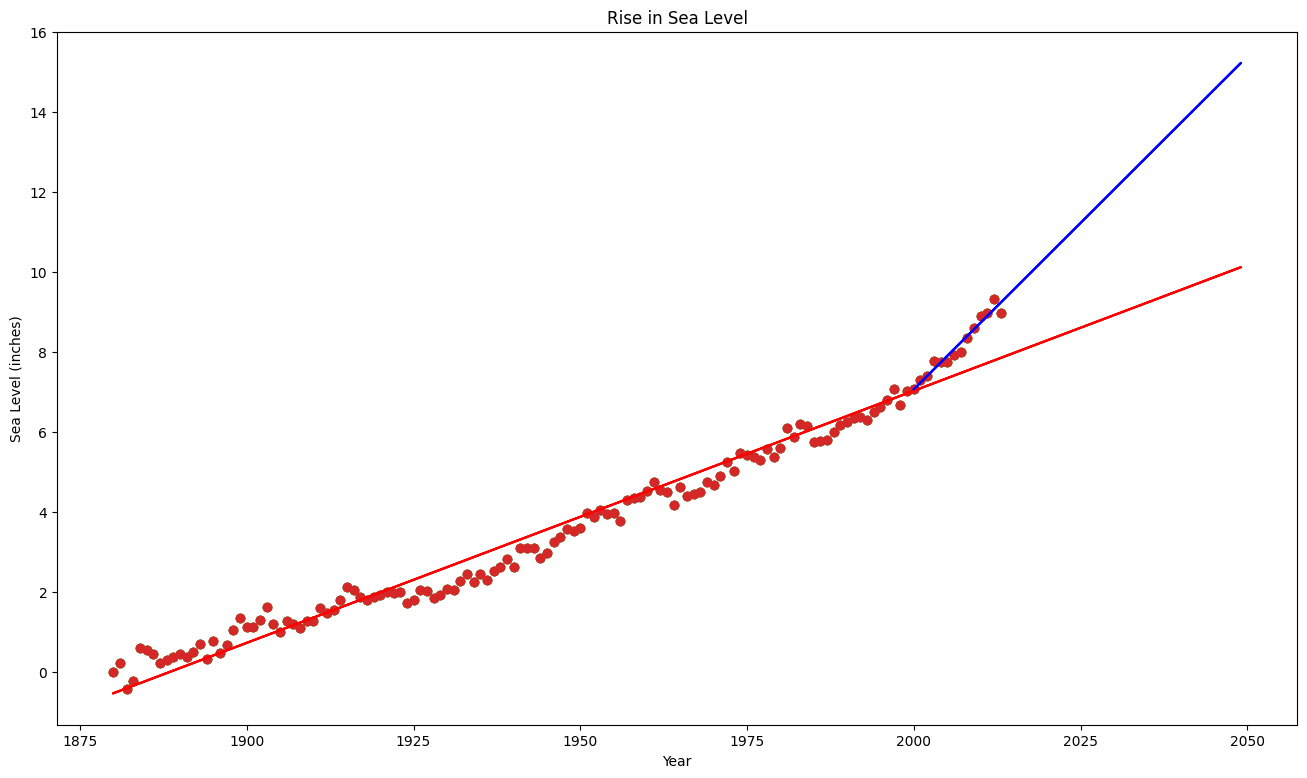

In [9]:
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)